# Basic Plotting Function

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json


In [4]:
filename = f"../results/ppo/testing/metrics.json"
with open(filename, "r") as f:
    raw_data = json.load(f)

def build_dataframe(data): #TODO: add keys
    records = {}
    for key in data.keys():
        n = key.split("_")[1]
        if len(n) > 3: continue # skip abs metric
        n = int(n)
        entry = {"mean_episode_returns": data[key]["mean_episode_returns"][0], 
            "mean_episode_length": data[key]["mean_episode_length"][0], 
            "steps_per_second": data[key]["steps_per_second"][0]}
        records[n] = entry
    df = pd.DataFrame.from_dict(records, orient="index")
    return df

seed = 'seed_42'
cartpole_data = build_dataframe(raw_data["CartPole-v1"]['PPO'][seed])
acrobot_data = build_dataframe(raw_data["Acrobot-v1"]['PPO'][seed])

<Axes: title={'center': 'Acrobot-v1'}>

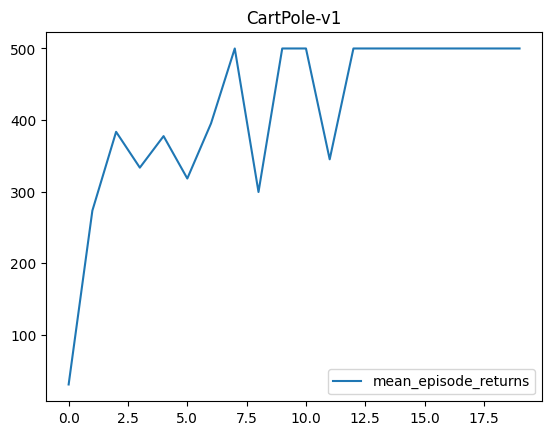

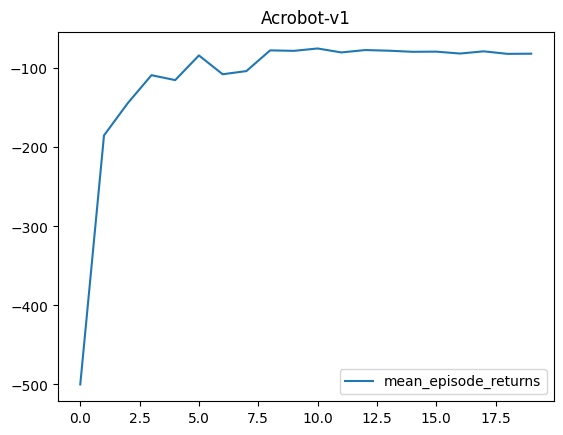

In [5]:
# Plot training

cartpole_data.plot(y="mean_episode_returns", title="CartPole-v1")

acrobot_data.plot(y="mean_episode_returns", title="Acrobot-v1")